# Proyecto Final 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Tomaremos un dataset de clientes que han tenido un seguro y buscamos si pueden contratar otro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#**Weka**
En el análisis que relizamos en la herramienta Weka, nos mostró que los atributos más importantes del dataset son: 

- Vehicle Damage
- Annual Premium

De igual forma, podemos ver que la prima anual tiene una gran cantidad de outliers, de igual forma tenemos una desviacion estandar muy alta, lo cual puede implicar que un trim podria ayudar a nuestros modelos.

## EDA
Exploratory Data Analysis

Veamos una breve descripcion del DataFrame

In [ ]:
df['Response'].describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

In [ ]:
df.describe()# EStadistica descriptiva del df inicial

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Viendo la descripcion del dataframe podemos observar a priori ciertos elementos: 
- Tenemos un desbalanceo de clases ya que solo tenemos el 12.25% de las muestras con una respuesta positiva
- Aproximadamente toda nuestra poblacion cuenta con una licencia de conducir un 99.78%
-Casi la mitad de nuestros registros han tenido seguro con anterioridad

Veamos la correlacion entre las variables 

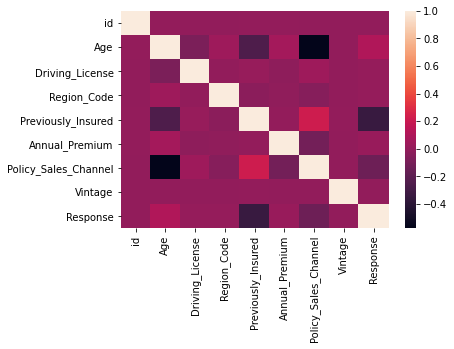

In [ ]:
sns.heatmap(df.corr())# tabla de correlacion entre variables numericas

Vemos que la edad y el canal de ventas es inversamente proporcional, esto puede suponer una tendencia a que los distintos rangos de edad tienen preferencia a algun canal en especifico. 

Tambien vemos que el hecho de si estaban previamente asegurados afecta de forma inversa a la respuesta, esto nos puede ayuar mucho a determinar como una variable clara para definir si adquiriran o no una nueva poliza. 

## Graficas
Hagamos algunas preguntas para definir la data y que nos diga más la información que tenemos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


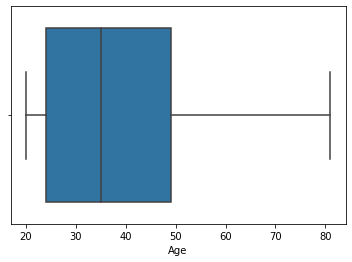

In [ ]:
#Edades
sns.boxplot(df.sample(10000)['Age']) #Grafica de bigote


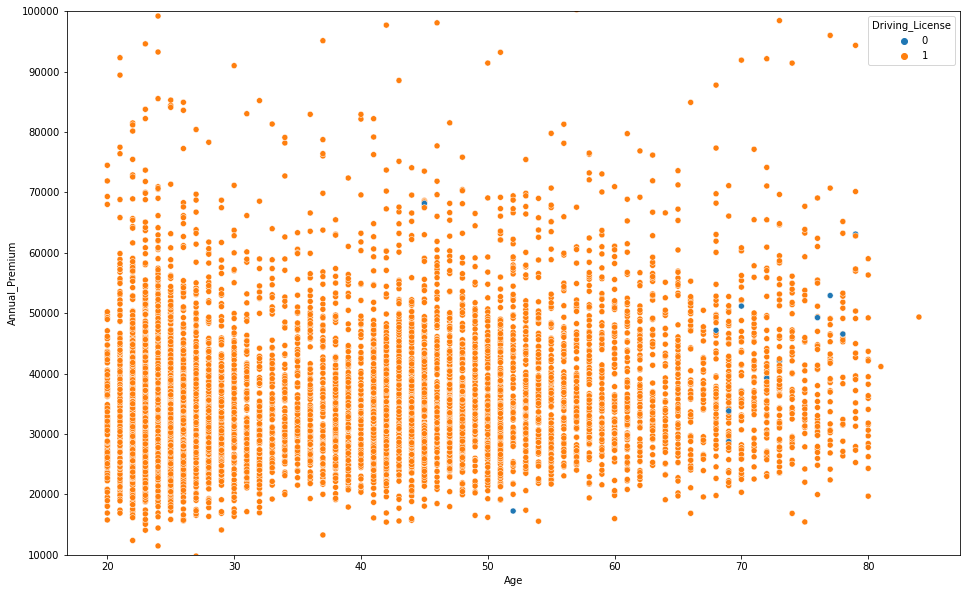

In [ ]:
#Hagamos un scatter plot de ingreso y las licencias que tienen
#Al ser muchos datos, tomaremos un sample de 10,000 datos 
fig, ax=plt.subplots(figsize=(16,10))
ax=sns.scatterplot(data=df.sample(10000), x="Age", y="Annual_Premium", hue="Driving_License")
ax.set_ylim(10000,100000)
plt.show()

Sin ver un patrón en específico podemos observar que están entre 0 y 10,000 USD en la prima anual promedio. 

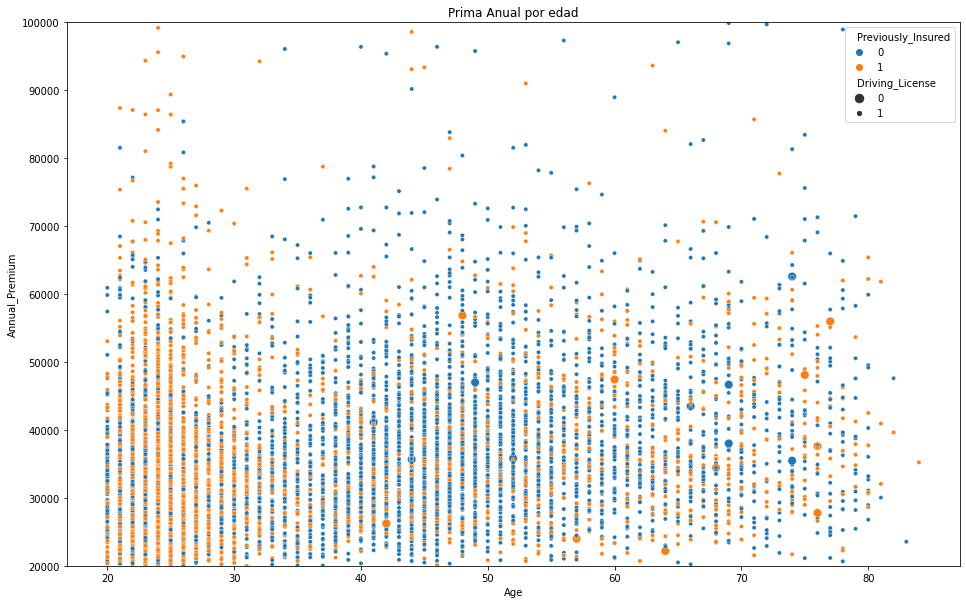

In [ ]:
fig, ax=plt.subplots(figsize=(16,10))
ax=sns.scatterplot(data=df.sample(10000), x="Age", y="Annual_Premium", hue="Previously_Insured",size='Driving_License')# Creamos la grafica
ax.set_ylim(20000,100000)#Acotamos limites
ax.set_title('Prima Anual por edad')
plt.show()

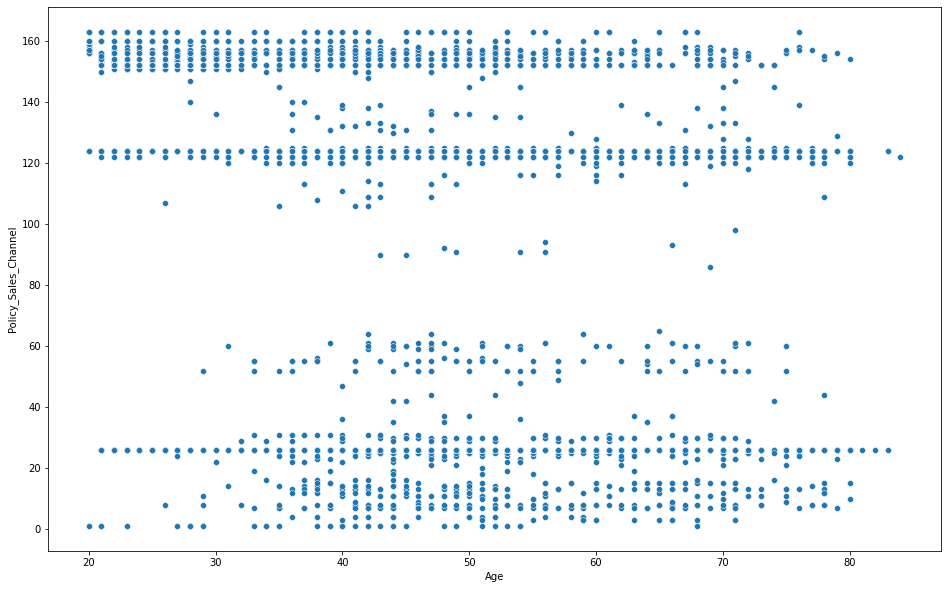

In [ ]:
fig, ax=plt.subplots(figsize=(16,10))
ax=sns.scatterplot(data=df.sample(10000), x="Age", y="Policy_Sales_Channel")
plt.show()# La edad y el canal 

Las gráficas nos han mostrado poca información, solo que la gran mayoría de personas entre 33 a 60 años no estuvo previamente asegurado. Esto nos dice que los menores de esta edad ya estaban previamente asegurados, quizá pudo ser por un familiar. 

Además, a partir de los 55 años es en donde aparece la gente que ya no tiene licencia de conducir, se ven algunos outliers en edades más tempranas pero nada que tomar en cuenta.

Al tener datos que parecen categóricos, debemos de segmentar la información por ejemplo la de la edad para poder visualizar mejor sus segmentos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


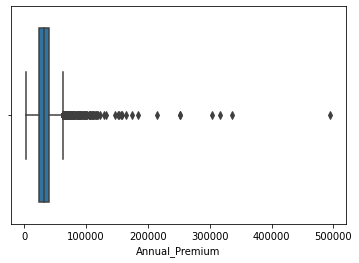

In [ ]:
#Veamos el costo anual de la prima 
sns.boxplot(df.sample(10000)['Annual_Premium'])

Tenemos unos claros outliers, veamos un poco a profundidad la situación. 

In [ ]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Al ver esto, encontramos que el 75% del dataset se encuentra por debajo de los $40,000 en la prima anual 

In [ ]:
df.loc[df['Annual_Premium']>80000,'Annual_Premium'].describe()

count      2365.000000
mean     107395.788584
std       51345.401085
min       80022.000000
25%       84984.000000
50%       92175.000000
75%      105503.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Viendo el drill down, vemos que podemos cortar los outliers ya que nuevamente el 75% de los datos se encuentran por debajo de 67,130

In [ ]:
df=df.loc[df['Annual_Premium']<60000].reset_index()#Eliminamos los outliers
df.head()

,index,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Annual_Premium'].describe()

count    368949.000000
mean      29106.805819
std       14608.897155
min        2630.000000
25%       24050.000000
50%       31255.000000
75%       38464.000000
max       59999.000000
Name: Annual_Premium, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


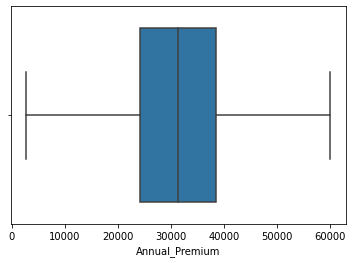

In [ ]:
sns.boxplot(df['Annual_Premium'])

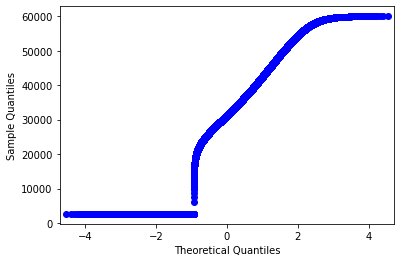

In [ ]:
#Si bien aparenta que los datos estan normalizados, consideramos mejor hacer una qqplot para ver su probabilidad
sm.qqplot(df['Annual_Premium'].to_numpy())
plt.show()

En la grafica de cuantiles o de probabilidad vemos que tiene un sesgo hacia abajo, es decir una parte considerable de los datos tiene una prima anual menor a 10,000. Para ser mas preciso es 2630 el limite inferior. Podemos detectarlo como outliers? 

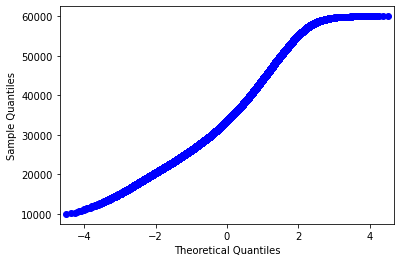

In [ ]:
sm.qqplot(df.loc[df['Annual_Premium']>10000,'Annual_Premium'].to_numpy())
plt.show()

In [ ]:
df.loc[df['Annual_Premium']<10000,'Annual_Premium'].describe()

count    64882.000000
mean      2630.446426
std         52.329471
min       2630.000000
25%       2630.000000
50%       2630.000000
75%       2630.000000
max       9816.000000
Name: Annual_Premium, dtype: float64

In [ ]:
condiciones=[(df['Age']<=25),(df['Age']>25)&(df['Age']<=40),(df['Age']>40)&(df['Age']<=65),(df['Age']>65)]
valores=['Young','Young Adult','Adult','Elder']
df['Sector']=np.select(condiciones,valores)
df.head()

,index,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Sector
0,0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Adult
1,1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Elder
2,2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Adult
3,3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Young
4,4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Young Adult


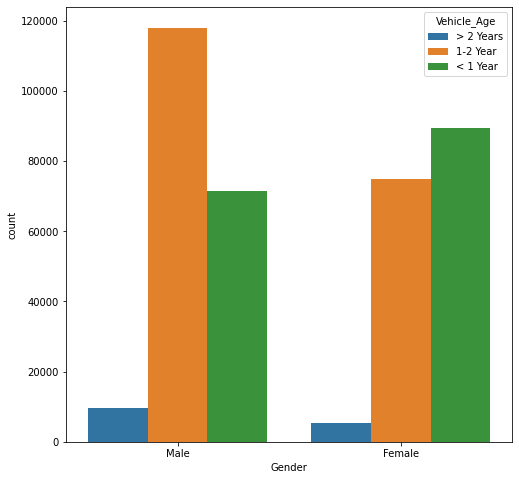

In [ ]:
#Busquemos la tendencia a antigüedad de autos por rango de edad
fig,ax=plt.subplots(figsize=(8,8))
ax = sns.countplot(x="Gender", hue="Vehicle_Age", data=df)

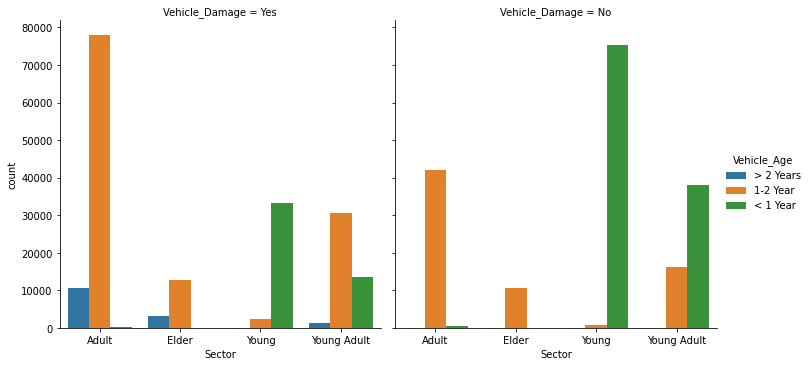

In [ ]:
ax = sns.catplot(x="Sector", hue="Vehicle_Age",col='Vehicle_Damage', kind='count',data=df)

Vemos que proliferan los autos nuevos en los más jóvenes. Además que la gran mayoría de los autos de los adultos han tenido un daño previo. 

Para evitar quitar muchos outliers y perdamos enfoque, veamos qué tantos valores se encuentran fuera de la curva. Vemos que son 26073 valores lo cual podemos eliminarlos y así tener valores más estandarizados.

In [ ]:
df['Annual_Premium'].describe()

count    368949.000000
mean      29106.805819
std       14608.897155
min        2630.000000
25%       24050.000000
50%       31255.000000
75%       38464.000000
max       59999.000000
Name: Annual_Premium, dtype: float64

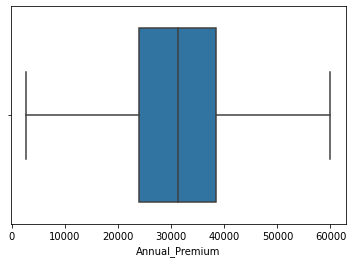

In [ ]:
sns.boxplot(x=df.sample(10000)['Annual_Premium'])
plt.show()

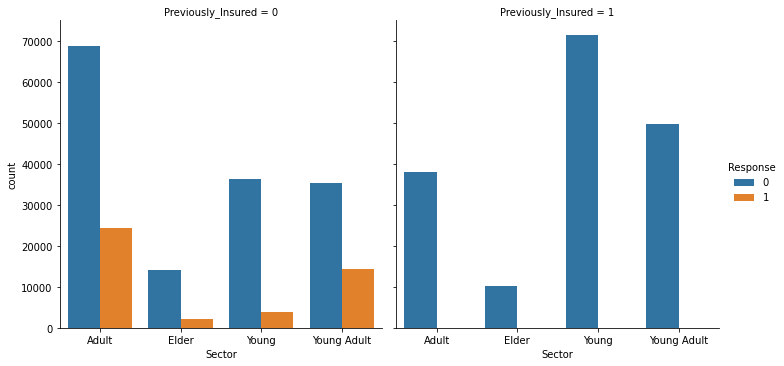

In [ ]:
#Por último veamos las personas que dieron respuesta positiva a si les gustaría contar con seguro de vehículo
ax = sns.catplot(x="Sector", hue="Response",col='Previously_Insured', kind='count',data=df)

In [ ]:
df.head(20)

,index,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Sector
0,0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Adult
1,1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Elder
2,2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Adult
3,3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Young
4,4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Young Adult
5,5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0,Young
6,6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0,Young
7,7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1,Adult
8,8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0,Young
9,9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0,Young Adult


# Modelo de ML: Regresion Logistica
## Modelo base

In [ ]:
#Importamos las librerias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [ ]:
df=df.drop(columns=['index','id'],axis=0)
ar=df.loc[df['Annual_Premium']>2630]
ar['Response'].value_counts()


0    267706
1     36366
Name: Response, dtype: int64

In [ ]:
df=df.apply(LabelEncoder().fit_transform)
#Modelo1
df1=df.loc[df['Annual_Premium']>2630]
df2=df.loc[df['Annual_Premium']<=2630]

In [ ]:
#Creamos una función que nos permita crear un modelo que escale la data e imprima las métricas necesarias
def logreg (df):
  X=df.drop(columns=['Response'])
  y=df[['Response']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#corregir a .2 
  pipe=Pipeline([('scale',StandardScaler()),('logistic',LogisticRegression())])#Pipeline
  pipe.fit(X_train,y_train)
  X_test=StandardScaler().fit_transform(X_test)
  print('Model Score: ',pipe.score(X_test,y_test))
  y_pred=pipe.predict(X_test)
  print(classification_report(y_test,y_pred))
  cm=confusion_matrix(y_test,y_pred,normalize='true')
  cm_display = ConfusionMatrixDisplay(cm,display_labels=pipe.classes_).plot()
  y_score = pipe.decision_function(X_test)
  fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=pipe.classes_[1])# Ratio de falsos positivos y verdaderos positivos
  roc_auc = auc(fpr, tpr) #Curva caracteristica
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,estimator_name='Data Model').plot()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  0.6511717121174214
              precision    recall  f1-score   support

           0       0.99      0.61      0.75     52753
           1       0.25      0.98      0.40      7202

    accuracy                           0.65     59955
   macro avg       0.62      0.79      0.58     59955
weighted avg       0.91      0.65      0.71     59955



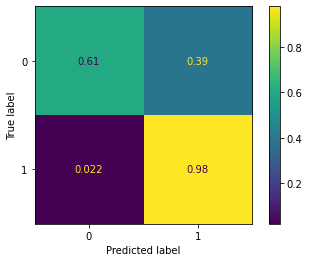

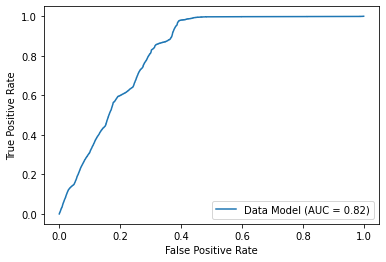

In [ ]:
mod1=logreg(df1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  0.6109866281170944
              precision    recall  f1-score   support

           0       0.97      0.57      0.72     12062
           1       0.23      0.89      0.37      1773

    accuracy                           0.61     13835
   macro avg       0.60      0.73      0.54     13835
weighted avg       0.88      0.61      0.67     13835



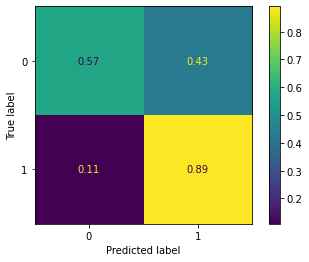

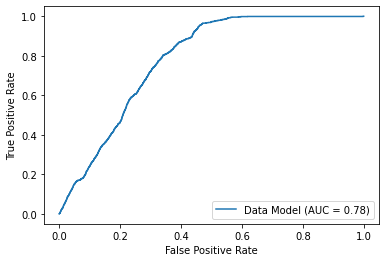

In [ ]:
mod2=logreg(df2)

In [ ]:
#Primero que nada deberemos de balancear las clases ya que estan muy por debajo de lo deseado 
df1['Response'].value_counts()
#Tenemos un desbalance 

0    263722
1     36052
Name: Response, dtype: int64

In [ ]:
#Importamos la herramienta que nos ayudara a balancear las clases
!pip install imblearn --upgrade
from imblearn.over_sampling import RandomOverSampler

Requirement already up-to-date: imblearn in /usr/local/lib/python3.7/dist-packages (0.0)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def logreg_new (df):
  count_0,count_1=df['Response'].value_counts()
  c_0=df[df['Response']==0]
  c_1=df[df['Response']==1]
  c_1=c_1.sample(count_0,replace=True)
  X=pd.concat([c_0,c_1],axis=0)
  y=X['Response']
  X=X.drop(columns=['Response'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#dividimos el data frame en train y test
  pipe=Pipeline([('scale',StandardScaler()),('logistic',LogisticRegression())])#Pipeline
  grid_params_lr = [{'logistic__C': [100,1,10],'logistic__solver': ['liblinear','saga','lbfgs'],'logistic__multi_class':['ovr']}] 
  final_lr=GridSearchCV(estimator=pipe,param_grid=grid_params_lr,cv=5)
  final_lr.fit(X,y)
  sc=StandardScaler()
  X_test=sc.fit_transform(X_test)
  print('Model Score: ',final_lr.score(X_test,y_test))
  print('======================================')
  print('Classification Report')
  y_pred=final_lr.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('======================================')
  print('Confusion Matrix')
  cm=confusion_matrix(y_test,y_pred,normalize='true')
  cm_display = ConfusionMatrixDisplay(cm,display_labels=final_lr.classes_).plot()
  fig, ax=plt.subplots()
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.3)
  rfc_disp = plot_roc_curve(final_lr, X_test, y_test, ax=ax, alpha=0.8)
  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic curve")
  plt.show()


Model Score:  0.7939216411189792
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.61      0.75     52783
           1       0.71      0.98      0.83     52706

    accuracy                           0.79    105489
   macro avg       0.84      0.79      0.79    105489
weighted avg       0.84      0.79      0.79    105489

Confusion Matrix


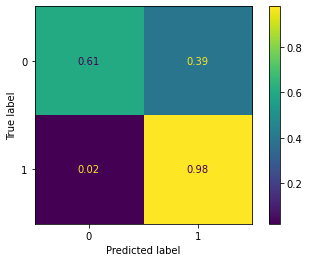

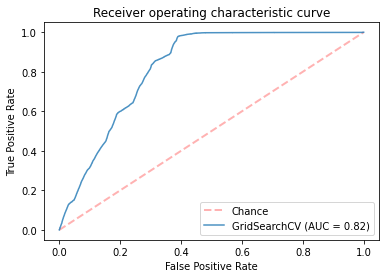

In [ ]:
mod3=logreg_new(df1)

Model Score:  0.7484156898479891
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.54      0.68     12057
           1       0.67      0.96      0.79     12086

    accuracy                           0.75     24143
   macro avg       0.80      0.75      0.74     24143
weighted avg       0.80      0.75      0.74     24143

Confusion Matrix


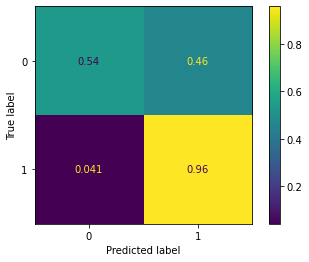

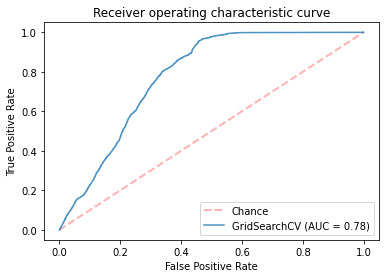

In [ ]:
mod4=logreg_new(df2)

In [ ]:
#Dado que ni cambiando los mugres paramteros y haciendo un upsample de la data nos da mejores metricas intentaremos un Random Forest Classifier para esto 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_roc_curve
def clf_rfc(df):
  count_0,count_1=df['Response'].value_counts()
  c_0=df[df['Response']==0]
  c_1=df[df['Response']==1]
  c_1=c_1.sample(count_0,replace=True)
  X=pd.concat([c_0,c_1],axis=0)
  y=X['Response']
  X=X.drop(columns=['Response'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#dividimos el data frame en train y test
  scale=StandardScaler()
  X_train=scale.fit_transform(X_train)
  RFC=DecisionTreeClassifier()
  RFC.fit(X_train,y_train)
  sc=StandardScaler()
  X_test=sc.fit_transform(X_test)
  print('Model Score: ',RFC.score(X_test,y_test))
  print('======================================')
  print('Classification Report')
  y_pred=RFC.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('======================================')
  print('Confusion Matrix')  
  cm=confusion_matrix(y_test,y_pred,normalize='true')
  cm_display = ConfusionMatrixDisplay(cm,display_labels=RFC.classes_).plot()
  fig, ax=plt.subplots()
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.3)
  rfc_disp = plot_roc_curve(RFC, X_test, y_test, ax=ax, alpha=0.8)
  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic curve")
  plt.show()

Model Score:  0.8991838011546227
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     52783
           1       0.89      0.90      0.90     52706

    accuracy                           0.90    105489
   macro avg       0.90      0.90      0.90    105489
weighted avg       0.90      0.90      0.90    105489

Confusion Matrix


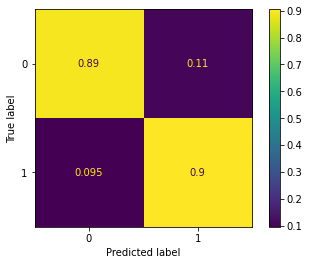

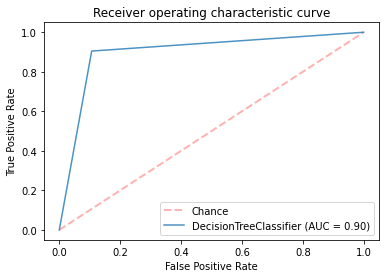

In [ ]:
mod5=clf_rfc(df1)

Model Score:  0.9377045106241975
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     12057
           1       0.89      1.00      0.94     12086

    accuracy                           0.94     24143
   macro avg       0.94      0.94      0.94     24143
weighted avg       0.94      0.94      0.94     24143

Confusion Matrix


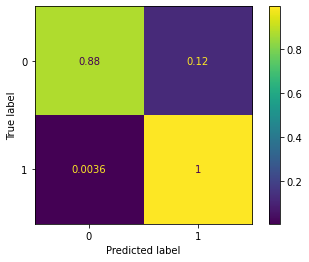

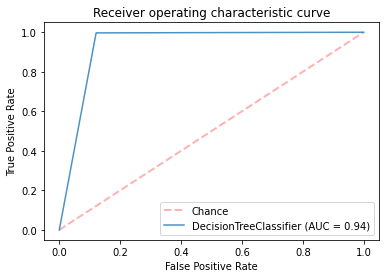

In [ ]:
mod6=clf_rfc(df2)

#**Conclusiones**

Con esto nos podemos dar cuenta que, sí hay mercado para vender seguros de auto, ya que la mayoría cuenta con licencia, en todas las edades se 
ve que cuentan con autos nuevos que podrían ser asegurados. 

Sin embargo, nos dimos cuenta que las personas que no están aseguradas
respondieron que no están interesadas a adquirir otro tipo de seguro, 
aunque tengan autos. 

La pregunta ahora es ¿hacia donde dirigimos nuestra mercadotécnia?